## EX01

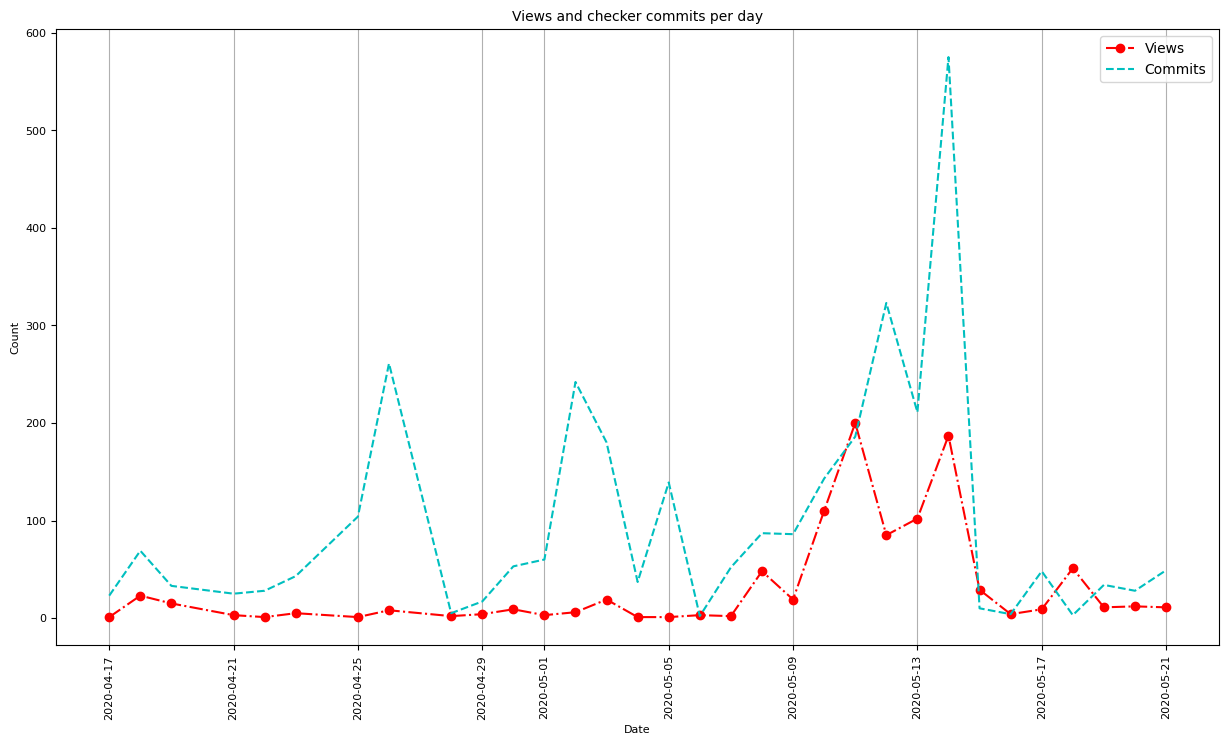

In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('../data/checking-logs.sqlite')

# Загрузка просмотров (без админов)
views_query = """
SELECT datetime
FROM pageviews
WHERE uid NOT LIKE 'admin%'
"""
views_df = pd.read_sql(views_query, conn)
views_df['datetime'] = pd.to_datetime(views_df['datetime'])
views_df['date'] = views_df['datetime'].dt.date
views_by_date = views_df.groupby('date').size().reset_index(name='views')

# Загрузка коммитов (без админов), исправлено имя поля
commits_query = """
SELECT timestamp
FROM checker
WHERE uid NOT LIKE 'admin%'
"""
commits_df = pd.read_sql(commits_query, conn)
commits_df['timestamp'] = pd.to_datetime(commits_df['timestamp'])
commits_df['date'] = commits_df['timestamp'].dt.date
commits_by_date = commits_df.groupby('date').size().reset_index(name='commits')

# Объединение по дате — только даты с обоими показателями
merged = pd.merge(views_by_date, commits_by_date, on='date', how='inner')

# Построение графика с указанием стилей:
# views: красная линия '.-.', с круглыми маркерами 'o'
# commits: голубая линия '--' (пунктирная)
ax = merged.plot(
    x='date',
    y='views',
    figsize=(15, 8),
    fontsize=8,
    style='r-.o',    # red, point-dash-dot, с маркерами 'o' (точки)
    label='Views',
    rot=45,
    grid=False      # пока выключаем сетку, включим ниже
)

# Добавляем линию коммитов с нужным стилем
merged.plot(
    x='date',
    y='commits',
    ax=ax,
    style='c--',   # cyan, dashed line
    label='Commits',
    rot=90,
    fontsize=8
)

# Оформление осей и заголовка
ax.set_xlabel("Date", fontsize=8)
ax.set_ylabel("Count", fontsize=8)
ax.set_title("Views and checker commits per day", fontsize=10)

# Включаем только вертикальные линии сетки (ось X)
ax.grid(axis='x')

#### Подсчёт количества дней с просмотрами > 150

In [2]:
count_over_150 = (merged['views'] > 150).sum()
print("The answer is", count_over_150)

conn.close()

The answer is 2
